# Problem I - Part A:

You wake up in the morning and can't remember where you are, as your
mind's still foggy. What is the probability you are in Pittsburgh where you
normally live, back home with your family, or on vacation? (Feel free to make
informed guesses for any unknown numbers).

## Simple answers that satisfy the requirements of the assignment:
These answers are derived based on 2024 data that count how many days last year I spent in Pittsburgh and how many days last year I spent away. I use that to predict the probability that any given day in 2025 the following will happen to me.

- Probability I will be in pittsburgh: (365 - 14) / 365 = 0.962
- Probability taht I will be back home with my family: 0 / 365 = 0
- Probability that I will be on vacation 14/ 365 = 0.0384

## Extra work I did
Used a beysian inference to construct posterior probability that I will be away on vacation in 2025, using the fact that I was away 14 days in 2024.


/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_30257/3799857029.py:12: RuntimeWarning: divide by zero encountered in divide
  prior_j = np.sqrt(1 / p / (1 - p))


Where Bad:  (array([  0, 500]),)
Most likely value of p: 0.038


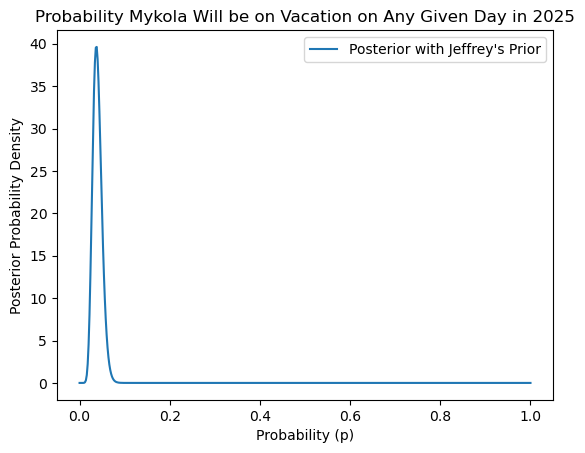

In [27]:
import numpy as np
import scipy.interpolate as interpol
import matplotlib.pyplot as plt
import scipy.integrate as integrate
    
p = np.linspace(0., 1., 501)  # set up an evenly-spaced array of probability values

# set up the likelihood function (un-normalized) and plot it.
likelihood = p**14 * (1 - p)**(365 - 14)

## Setup Jeffrey's Prior
prior_j = np.sqrt(1 / p / (1 - p))

# Calculates whbad for the new priors
whbad = np.where(np.isfinite(prior_j) == False)
print("Where Bad: ", whbad) 

## Edits priors to exclude infinite values
prior_j[whbad] = 0

## Calculates posterior

posterior_j = interpol.interp1d(p, likelihood * prior_j, kind='cubic')

## Normalizing the posterior

norm_j = (integrate.quad(posterior_j, 0., 1.))[0]

## Calculating normalized posterior

posterior_j_norm = likelihood * prior_j / norm_j

## Plotting Posterior
plt.plot(p, posterior_j_norm, label='Posterior with Jeffrey\'s Prior')
plt.title('Probability Mykola Will be on Vacation on Any Given Day in 2025')
plt.xlabel('Probability (p)')
plt.ylabel('Posterior Probability Density')
plt.legend()

index_max = np.argmax(posterior_j_norm)  # Find index of maximum value
p_max = p[index_max]  # Get corresponding p-value
print('Most likely value of p:', p_max)

# Problem I - Part B:

You wake up a little more and notice that you can hear the sounds of the ocean.  What would you estimate the probabilities to be now?  

Approach this problem from a Bayesian framework; be quantitative at each step.


Baye's Theorem here will apply:

$prob(B|A) = prob(A|B)prob(B)/prob(A)$

Here we are asking: what is the probability of being in pittsbrugh given that we hear ocean sounds.

$prob(pitt|ocean) = prob(ocean|pitt)prob(pitt)/prob(ocean)$

prob(pitt) = 0.962 (from Part A, because this is the probability of being in pittsburgh). 

prob(ocean) = 2/365 (probability of hearing the ocean at any given time based on 2024 stats).

prob(ocean|pitt) = 0 (probability of hearing ocean sounds in pittsburgh.


Therefore: prob(pitt|ocean) = 0






## Problem 2 ##

In a recent poll by Ipsos, out of 1035 American interviewees, 44% (455) said they
were fans of professional (NFL) football and 17% (176) were fans of soccer.
Choose one of these sports, and calculate the probability that the true fraction of
people in America who are fans of that sport is within +/-1%, 2%, 3%, 4%, 5%, or
10% of the percentage who said they were fans in the interviews.

 If you apply a prior, be sure to describe it explicitly. You should implement this as an Python
(or otherlanguage) function which takes as input the number of interviewees,
the number of positive results, and the percentage range about the result to
consider.

Note: you can consider this a binomial process: N people were interviewed about
their preferences, with M successes for a given sport, and we want to draw
conclusions about the probability a random person would be a fan of that sport,
which we can label as p.

## Mykola's Reasoning Behind Prior ##

I used Haldane Prior because it favors data that is at the extremes and I am not looking to reparametrise my data. In a binomial distribution representing this scenario, this means that Haldane Prior favors either everyone being an NFL fan or no one being an NFL fan. 

Considering that all I hear and see are folks talking about the superbowl, I create the inference/opinion that most folks are NFL fans and thus a Uniform Prior is innapropriate becuase it assumes zero opinion/knowledge on the data. A jeffrey's prior would also work, as it favors extremes, but since I have no need to re-parametrise my data: I do not use it.  Furthermore, I do not use an objective prior (i.e. Jeffrey's) because of the very strong and unobjective opinion I have that most folks are NFL fans. 

## Area Under the Curve ##

Probability that the true fraction of people in America who are fans of that sport is within +/-1%, 2%, 3%, 4%, 5%, or 10% of the percentage who said they were fans in the interview. 

So for example, when we read the following statement:

Area under the curve for p_max (43.2%) +/- 10%: 0.9978

We are saying that there is a 99.8% confidence that we area capturing the true fraction of folks who are NFL fans within the range of 33.2% to 53.3%


/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_2874/3055065104.py:13: RuntimeWarning: divide by zero encountered in divide
  prior_h = 1 / p / (1 - p)


Area under the curve for p_max (0.440) +/- 1%: 0.4842
Area under the curve for p_max (0.440) +/- 2%: 0.8072
Area under the curve for p_max (0.440) +/- 3%: 0.9508
Area under the curve for p_max (0.440) +/- 4%: 0.9932
Area under the curve for p_max (0.440) +/- 5%: 1.0015
Area under the curve for p_max (0.440) +/- 10%: 1.0027


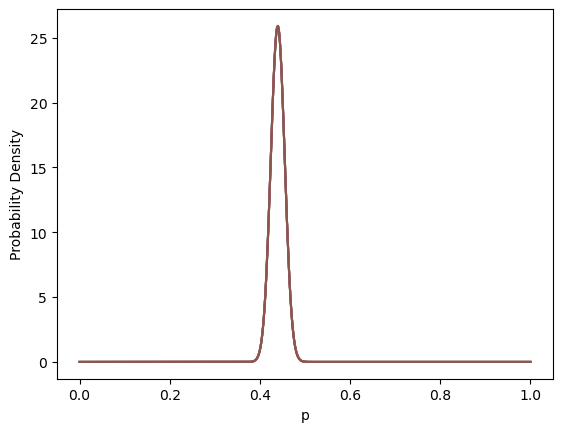

In [ ]:
import numpy as np
import scipy.interpolate as interpol
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def compute_bayesian_posterior(num_interviewees, num_positive, percent_range):
    p = np.linspace(0., 1., 501)  # set up an evenly-spaced array of probability values

    # set up the likelihood function (un-normalized) and plot it.
    likelihood = p**num_positive * (1 - p)**(num_interviewees - num_positive)

    ## Setup Haldane Prior
    prior_h = 1 / p / (1 - p)

    # Calculates whbad for the new priors
    whbad = np.where(np.isfinite(prior_h) == False)

    ## Edits priors to exclude infinite values
    prior_h[whbad] = 0

    ## Calculates posterior

    posterior_j = interpol.interp1d(p, likelihood * prior_h, kind='cubic')

    ## Normalizing the posterior

    norm_j = (integrate.quad(posterior_j, 0., 1.))[0]

    ## Calculating normalized posterior

    posterior_j_norm = likelihood * prior_h / norm_j

    ## Plotting Posterior
    plt.plot(p, posterior_j_norm, label='Posterior with Haldane\'s Prior')
    plt.xlabel('p')
    plt.ylabel('Probability Density')


    index_max = np.argmax(posterior_j_norm)  # Find index of maximum value
    p_max = p[index_max]  # Get corresponding p-value
    posterior_max_value = posterior_j_norm[index_max]  # Max posterior value

    # Create an interpolation function for the normalized posterior
    posterior_norm_interp = interpol.interp1d(p, posterior_j_norm, kind='cubic')
    lower_bound = p_max - percent_range / 100
    upper_bound = p_max + percent_range / 100
    area, _ = integrate.quad(posterior_norm_interp, lower_bound, upper_bound)

    print("Area under the curve for p_max ({:.3f}) +/- {:1.0f}%: {:.4f}".format(p_max, percent_range, area))

compute_bayesian_posterior(1035, 455, 1)
compute_bayesian_posterior(1035, 455, 2)
compute_bayesian_posterior(1035, 455, 3)
compute_bayesian_posterior(1035, 455, 4)
compute_bayesian_posterior(1035, 455, 5)
compute_bayesian_posterior(1035, 455, 10)
